## LeNet'98

Особенности LeNet5:

- Свёрточная нейросеть, использующая последовательность из трёх слоёв: слои свёртки (convolution), слои группирования (pooling) и слои нелинейности (non-linearity) –> с момента публикации работы Лекуна это, пожалуй, одна из главных особенностей глубокого обучения применительно к изображениям.
- Подвыборка с использованием усреднения карт.
- Нелинейность в виде гиперболического тангенса или сигмоид.
- Финальный классификатор в виде многослойной нейросети.

<img src='https://drive.google.com/uc?exoprt=view&id=1pPe1aBh7ySg89cxbWEZ07iabvvXABUxd'>

Многие предобученные модели обучались на датасете ImageNet, который содержит 14,197,122 картинок - это набор данных размечанных изображений с высоким разрешением, относящихся примерно к 22 тысячам категорий. Проводился «Крупномасштабный конкурс визуального распознавания ImageNet» (ILSVRC2013). ILSVRC использует подмножество ImageNet из примерно 1000 изображений в каждой из 1000 категорий.

<img src='https://cv.gluon.ai/_images/imagenet_banner.jpeg'>

## AlexNet'12

В AlexNet результаты вычислений LeNet масштабированы в гораздо более крупную нейросеть, которая способна изучить намного более сложные объекты и их иерархии. Особенности:

- Использование блоков ReLU в качестве нелинейностей.
- Использование max pooling, что позволяет избежать эффектов усреднения average pooling.

На вход идут картинки 224х224, естественно не все картинки такого размера, поэтому будет достаточно просто сжать их до нужного размера.

<img src='https://drive.google.com/uc?export=view&id=1sjEftFGiJ50-m3VevamktVznsx6bY3Yw' width=700>

## VGG'14
В разработанных в Оксфорде VGG-сетях в каждом свёрточном слое впервые применили фильтры 3х3 и объединили эти слои в последовательности свёрток.

Вместо применяемых в AlexNet фильтров 9х9 и 11х11 стали применять гораздо более мелкие фильтры, которых старались избежать авторы LeNet. Но большим преимуществом VGG стала находка, что несколько свёрток 3х3, объединённых в последовательность, могут эмулировать более крупные свертки, например, 5х5 или 7х7.

Каскад из двух сверток 3х3 равен свертке 5х5, но с меньшим количеством параметров.
(5х5 = 25 + 1 = 26; 3x3 + 3x3 + 2 = 20)

<img src='https://drive.google.com/uc?export=view&id=1GvrtEDocJ3xp9RKqgQu0-JnyTssqZhzV'>

Глубокие сверточные нейронные сети превзошли человеческий уровень классификации изображений в 2015 году. Глубокие сети извлекают низко-, средне- и высокоуровневые признаки  сквозным многослойным способом, а увеличение количества слоев обогатить «уровни» признаков. Но у глубоких нейронных сетей была проблема: затухающие градиенты. Особенно это явно чувствуется с сигмоидой.

$d\sigma = \sigma(1 - \sigma) \leqslant \frac{1}{4}$

<img src='https://drive.google.com/uc?export=view&id=171JbyNkSSqzhPdX4fp439zOouEzJmq_s'>

## GoogLeNet

Эта сеть использует Inception блоки. Это параллельная комбинация свёрточных фильтров 1х1, 3х3 и 5х5. Но главная особенность заключается в использовании свёрточных блоков 1х1 для уменьшения количества каналов перед подачей в более «дорогие» сверточные блоки. Обычно эту часть называют bottleneck. Вместо использования свертки 5х5 на нашем изображении, можем сначала пройтись сверткой 1х1 уменьшив количество каналов, а затем по ним пройтись сверткой 5х5, вернув количество каналов. Операций будет меньше, а результат будет одинаковый.

<img src='https://drive.google.com/uc?export=view&id=1hgoTi6d-pdRPHgnfVGssQIQXBUdrkWrk'>

In [1]:
from keras.layers import Conv2D, Input
from keras.models import Model

inp = Input(shape=(8, 8, 256))
x = Conv2D(256, (5, 5))(inp)

model = Model(inp, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 8, 256)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 256)         1638656   
Total params: 1,638,656
Trainable params: 1,638,656
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.layers import Conv2D, Input
from keras.models import Model

inp = Input(shape=(8, 8, 256))
x = Conv2D(128, (1, 1))(inp)
x = Conv2D(256, (5, 5))(x)

model = Model(inp, x)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 8, 8, 256)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 256)         819456    
Total params: 852,352
Trainable params: 852,352
Non-trainable params: 0
_________________________________________________________________


Разработчики этой сети придумали способ, чтобы градиенты не затухали: вводится несколько вспомогательных функций на протяжении всей сети, чтобы когда градиент от первого выхода начинал затухать, подключался градиент со второго выхода.

<img src='https://drive.google.com/uc?export=view&id=1q3oJXpwGStYit5Ii13DIsexVqxwIjyjE'>

## ResNet'15

До этого боролись с затухающими градиентами только за счет ввода другой функции активации.

Чтобы преодолеть проблему затухающих градиентов, Microsoft ввела глубокую «остаточную» структуру обучения.

<img src='https://drive.google.com/uc?export=view&id=1RGJQl4-SmysYbAqwcy8Lm5qEPbiebZOO'>

Смысл:

$y = f(x) + x $<br>
$dy = df(x) + 1 $<br>
<h3>$\frac{dL}{dx} = \frac{dL}{dy} \frac{dy}{dx} = \frac{dL}{dy}(df(x) + 1 )$</h3><br>

То есть градиенты всё равно будут протекать дальше в немного измененном виде.


Соединения быстрого доступа (shortcut connections, residual connections) пропускают один или несколько слоев и выполняют сопоставление идентификаторов.

<img src='https://drive.google.com/uc?export=view&id=1JcQDIjA-97L2xs3o-JD4SWBld9J0OMW-'>

Еще одна особенность ResNet, что в конце отсутствуют полносвязные слои, причина в том, что имеется уже и так довольно сложная нейронная сеть, в которой уже и так могла решиться задача, которая обычна перекладывается на полносвязный слой.

<img src='https://drive.google.com/uc?export=view&id=1qqbZ6iWZaD6LMjuIJ85mBGYpBwi0w-HL'>

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, GlobalAvgPool2D, Dropout, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint

from keras.applications.resnet import ResNet50, preprocess_input as resnet_preproc
from keras.applications.vgg16 import VGG16, preprocess_input as vgg_preproc

import matplotlib.pyplot as plt

In [34]:
train_data_path = '../data/asl_alphabet_train/asl_alphabet_train/'
test_data_path = '../data/asl_alphabet_test/asl_alphabet_test/'

In [3]:
test_size = 0.3
batch_size = 32
input_shape = (256, 256)
seed = 1
num_epoch = 4
learning_rate = 0.001
num_classes = 29

## Load the Images with a generator

In [4]:
data_gen = ImageDataGenerator(
#     preprocessing_function=lambda x: x / 255.0,
    preprocessing_function=resnet_preproc,
    validation_split=test_size
)


train_gen = data_gen.flow_from_directory(
    directory=train_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    seed=seed,
    subset='training'
)

val_gen = data_gen.flow_from_directory(
    directory=train_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    seed=seed,
    subset='validation'
)

Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 256, 256, 3) (32, 29)


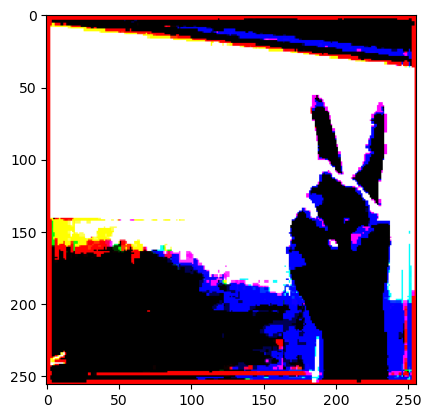

In [5]:
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py

for X, y in train_gen:
    print(X.shape, y.shape)
    plt.imshow(X[0])
    break

## Load the model


In [6]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(input_shape[0], input_shape[1], 3))
base_model.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

 conv2_block3_1_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
          

 conv3_block3_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block2_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block1_out[0][0]']       
                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
          

                                )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block1_add (Add)         (None, 8, 8, 2048)   0           ['conv5_block1_0_bn[0][0]',      
                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
          

In [7]:
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [8]:
# x = Flatten()(base_model.output)
x = GlobalAvgPool2D()(base_model.output)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Train the model


In [10]:
history = model.fit(
                train_gen,
                epochs=num_epoch,
                steps_per_epoch=50,
                validation_data=val_gen,
                validation_steps=10,
                callbacks=[
                    ModelCheckpoint(
                        filepath='best_model_{epoch}ep_{val_accuracy:.2f}',
                        save_best_only=True
                    )
                ]
            )

Epoch 1/4
50/50 [==============================] - ETA: 0s - loss: 1.1449 - accuracy: 0.6944

INFO:tensorflow:Assets written to: best_model_1ep_0.52\assets


INFO:tensorflow:Assets written to: best_model_1ep_0.52\assets


50/50 [==============================] - 31s 497ms/step - loss: 1.1449 - accuracy: 0.6944 - val_loss: 1.5636 - val_accuracy: 0.5250
Epoch 2/4
50/50 [==============================] - ETA: 0s - loss: 0.2449 - accuracy: 0.9206

INFO:tensorflow:Assets written to: best_model_2ep_0.71\assets


INFO:tensorflow:Assets written to: best_model_2ep_0.71\assets


50/50 [==============================] - 34s 688ms/step - loss: 0.2449 - accuracy: 0.9206 - val_loss: 1.0732 - val_accuracy: 0.7094
Epoch 3/4
50/50 [==============================] - ETA: 0s - loss: 0.1965 - accuracy: 0.9388

INFO:tensorflow:Assets written to: best_model_3ep_0.71\assets


INFO:tensorflow:Assets written to: best_model_3ep_0.71\assets


50/50 [==============================] - 34s 688ms/step - loss: 0.1965 - accuracy: 0.9388 - val_loss: 0.9673 - val_accuracy: 0.7063
Epoch 4/4
50/50 [==============================] - 23s 446ms/step - loss: 0.1694 - accuracy: 0.9444 - val_loss: 1.0797 - val_accuracy: 0.7000


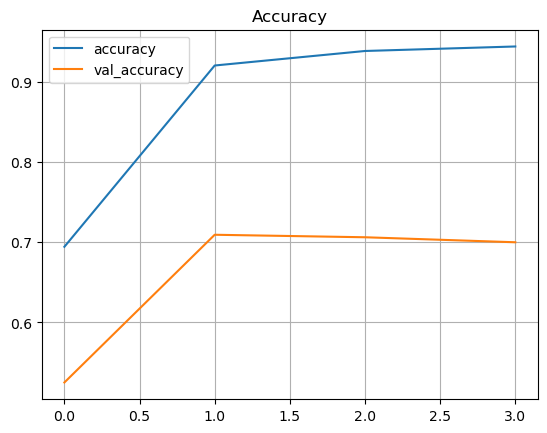

In [14]:
import pandas as pd
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.grid()
plt.show()

## Test Images

In [12]:
results = model.evaluate(val_gen, verbose=1, steps=100)

print(f"Test Loss: {results[0]:.5f}")
print(f"Test Accuracy: {results[1] * 100:.2f}%")

100/100 [==============================] - 35s 348ms/step - loss: 1.0048 - accuracy: 0.7134
Test Loss: 1.00479
Test Accuracy: 71.34%


## Visualize the result


In [13]:
from pathlib import Path
import cv2
import numpy as np

def show_predictions(preprocess_input, test_path):
    imgs = sorted(list(Path(test_path).glob('*.jpg')))
    print(len(imgs))

    columns = 7
    row = round(len(imgs) / columns)

    fig, ax = plt.subplots(row, columns, figsize=(columns * row, row * columns))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    i, j = 0, 0

    for img_path in imgs:
        origin_img = cv2.imread(str(img_path))
        origin_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
        label = img_path.parts[-1].split('_')[0]
        
        img = cv2.resize(origin_img, (256, 256))
        img = preprocess_input(img)

        prediction = model.predict(img[None])

        labels = (train_gen.class_indices)
        labels = dict((v,k) for k,v in labels.items())
        
        ax[i][j].imshow(origin_img)
        ax[i][j].set_title(f'GT {label}. Pred {labels[np.argmax(prediction, axis=1)[0]]}')
        ax[i][j].axis('off')
        j += 1
        if j == columns:
            j = 0
            i += 1

    plt.show()

28
1/1 [==============================] - 0s 26ms/step


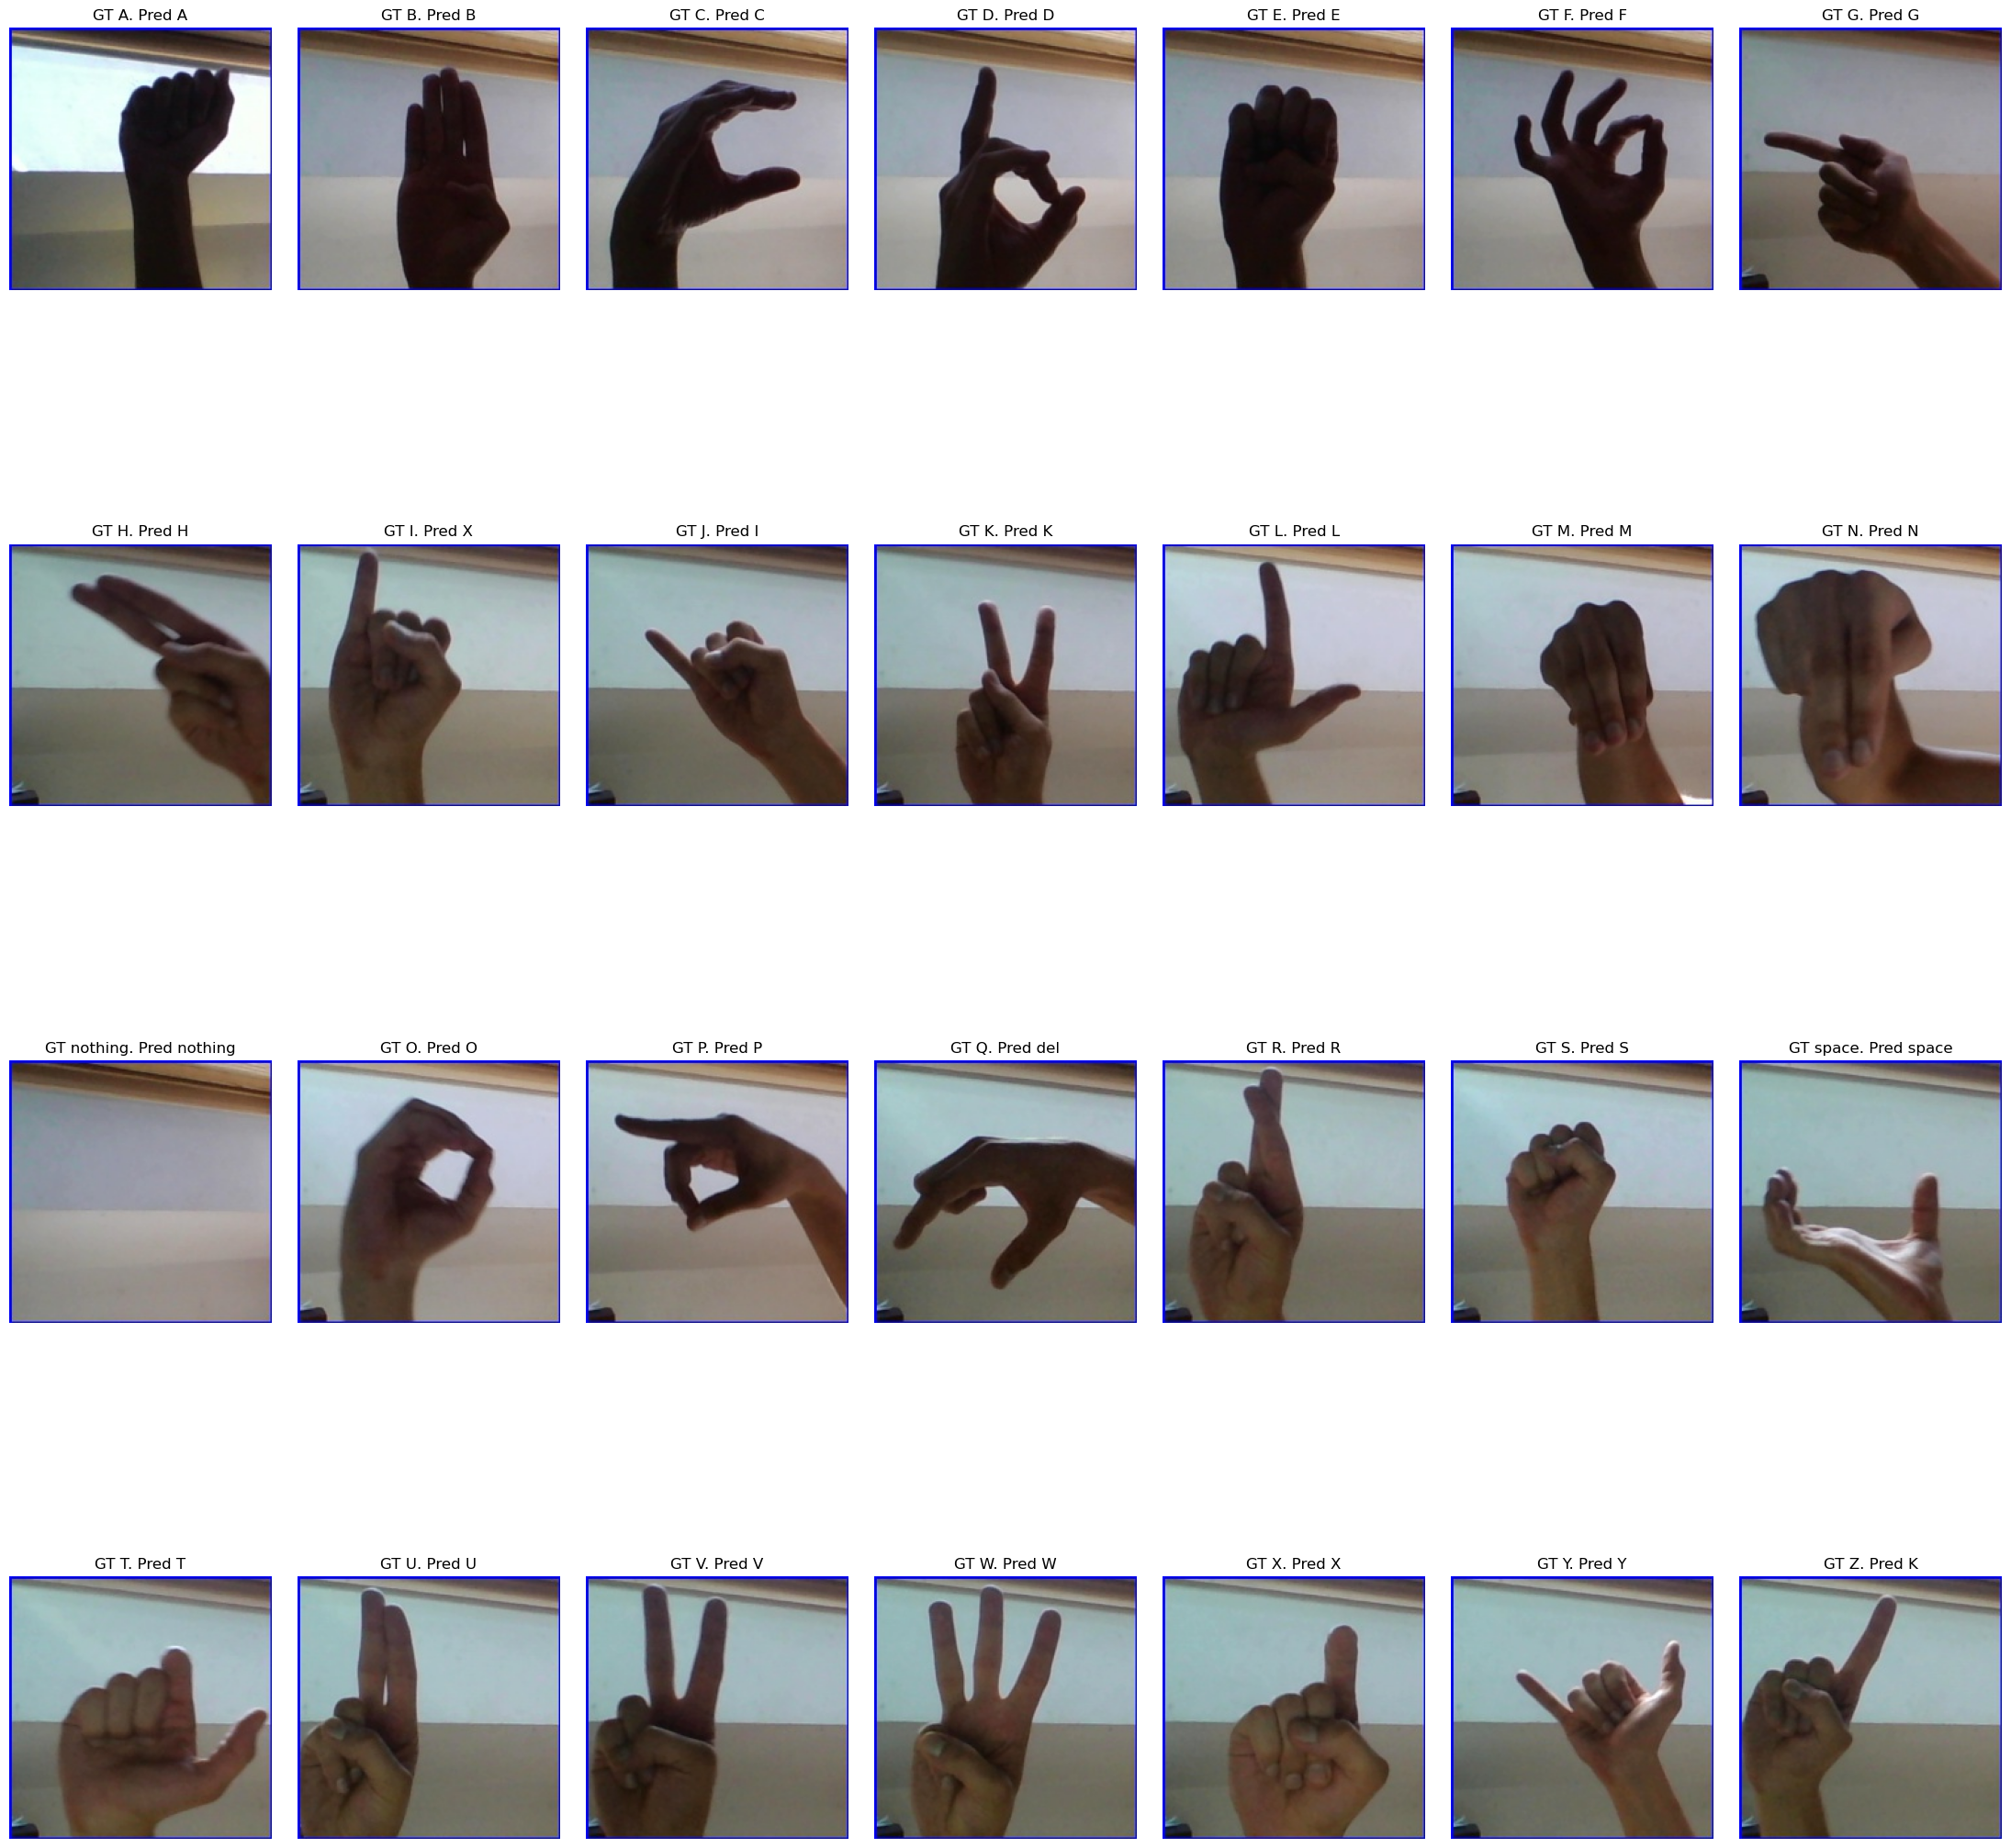

CPU times: total: 4.69 s
Wall time: 4.58 s


In [35]:
%%time
show_predictions(resnet_preproc, test_data_path)

---